In [1]:
# import talib
import numpy as np
# import pandas as pd
from backtesting_mom.signals1 import params_long, compute_signals_long
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'long'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "SOLUSDT",
    "BNBUSDT",
]

In [3]:
params = params_long()
print(params.keys())

Number of permutations params_long: 96
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for SOLUSDT
Start computing signals for BTCUSDT
Start computing signals for ETHUSDT
Start computing signals for BNBUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
End computing signals for BTCUSDT


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for BNBUSDT
Start computing portfolio metrics for SOLUSDT
End computing portfolio metrics for ETHUSDT
End computing portfolio metrics for SOLUSDT
End computing portfolio metrics for BTCUSDT
End computing portfolio metrics for BNBUSDT


In [5]:
print(count_bars)

8784


In [6]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(10)

       total_return   win_rate      count  profit_factor  max_drawdown  \
count     96.000000  96.000000  96.000000      96.000000     96.000000   
mean      -0.111626   0.657264  55.796875       0.490806     -0.124857   
std        0.029283   0.028557  13.084056       0.063887      0.026925   
min       -0.177276   0.599623  31.500000       0.379418     -0.187079   
25%       -0.121266   0.640152  44.875000       0.448629     -0.138530   
50%       -0.105188   0.649235  55.500000       0.463488     -0.117521   
75%       -0.093530   0.682023  66.500000       0.541368     -0.105260   
max       -0.060484   0.710103  77.000000       0.618122     -0.079080   

       expectancy  
count   96.000000  
mean    -2.026510  
std      0.385507  
min     -2.801375  
25%     -2.248533  
50%     -2.175433  
75%     -1.678890  
max     -1.295277  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
10         22           28                -0.103628  0.710103   77.0   
                        32                -0.103628  0.710103   77.0   
                        30                -0.103628  0.710103   77.0   
                        34                -0.103628  0.710103   77.0   
18         24           34                -0.060484  0.696727   44.5   
                        32                -0.060484  0.696727   44.5   
                        30                -0.060484  0.696727   44.5   
                        28                -0.060484  0.696727   44.5   
10         24           28                -0.130858  0.687057   76.5   
                        30                -0.131751  0.681749   77.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
10         22           28                  0.618122     -0.124098   -1.295277  
                        32                  0.618122     -0.124098   -1.295277  
                        30                  0.618122     -0.124098   -1.295277  
                        34                  0.618122     -0.124098   -1.295277  
18         24           34                  0.572023     -0.079080   -1.523916  
                        32                  0.572023     -0.079080   -1.523916  
                        30                  0.572023     -0.079080   -1.523916  
                        28                  0.572023     -0.079080   -1.523916  
10         24           28                  0.582710     -0.148083   -1.560579  
                        30                  0.577962     -0.146709   -1.615093

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for BNBUSDT
Start computing signals for SOLUSDT
Start computing signals for BTCUSDT
Start computing signals for ETHUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
End computing signals for BTCUSDT
Start computing portfolio for BTCUSDT
End computing portfolio for BTCUSDT
Start computing portfolio for ETHUSDT
End computing portfolio for ETHUSDT
Start computing portfolio for SOLUSDT
End computing portfolio for SOLUSDT
Start computing portfolio for BNBUSDT
End computing portfolio for BNBUSDT


In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
10         22           28                -0.103628  0.710103   77.0   
                        32                -0.103628  0.710103   77.0   
                        30                -0.103628  0.710103   77.0   
                        34                -0.103628  0.710103   77.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
10         22           28                  0.618122     -0.124098   -1.295277  
                        32                  0.618122     -0.124098   -1.295277  
                        30                  0.618122     -0.124098   -1.295277  
                        34                  0.618122     -0.124098   -1.295277

#########################
BTCUSDT


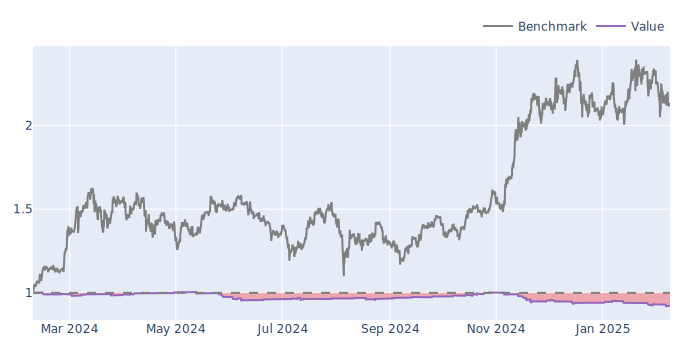

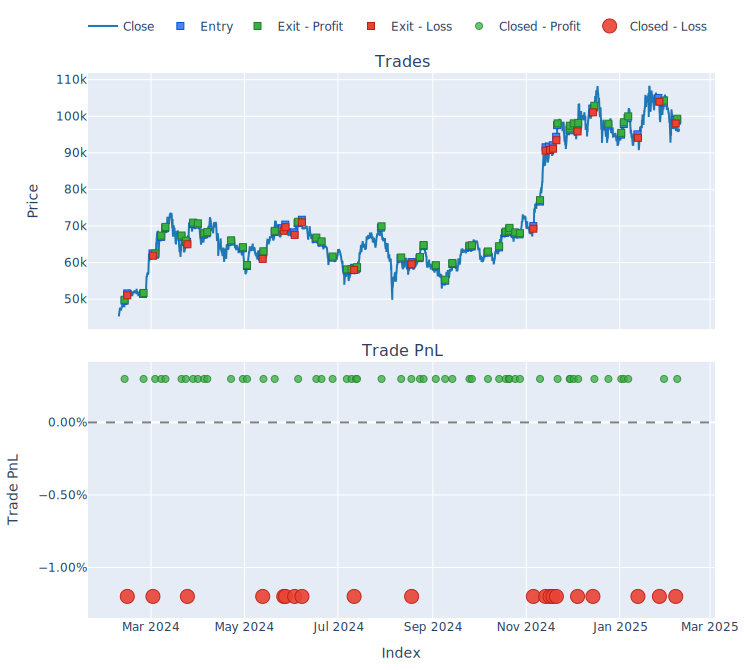

#########################
#########################
ETHUSDT


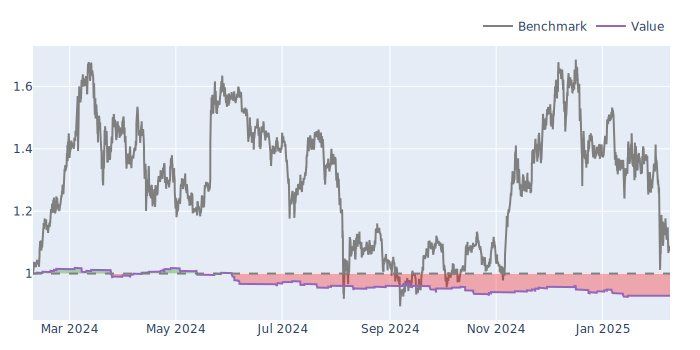

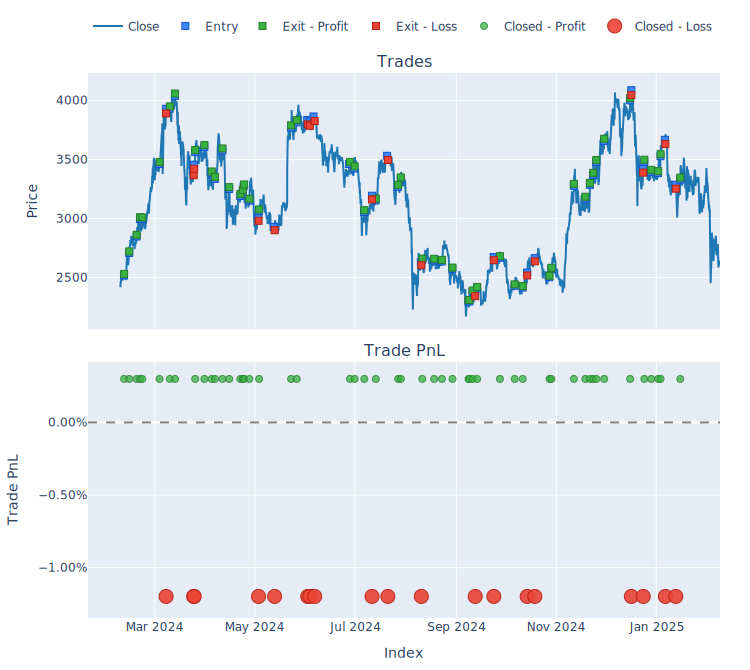

#########################
#########################
SOLUSDT


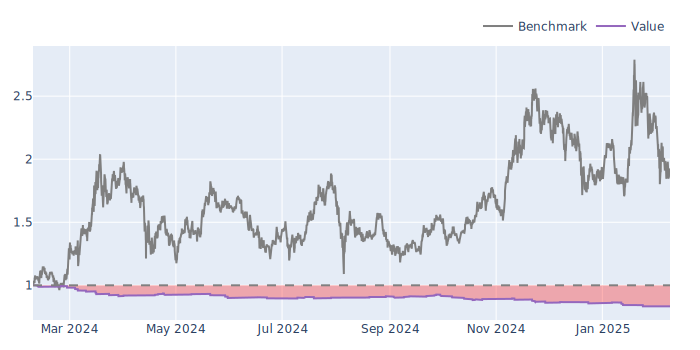

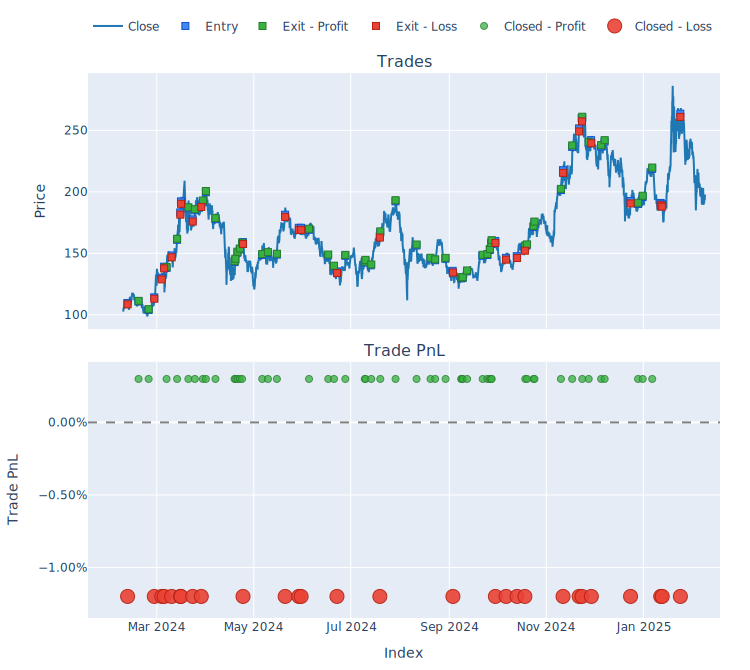

#########################
#########################
BNBUSDT


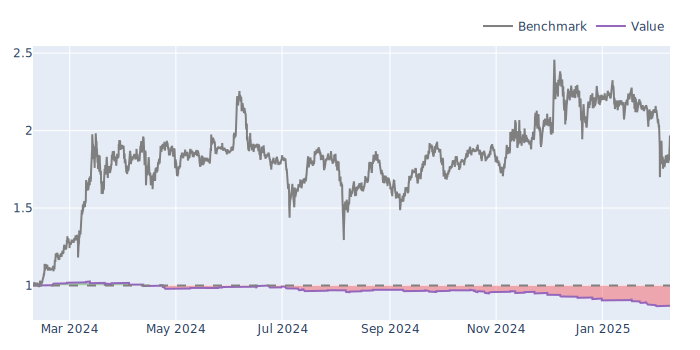

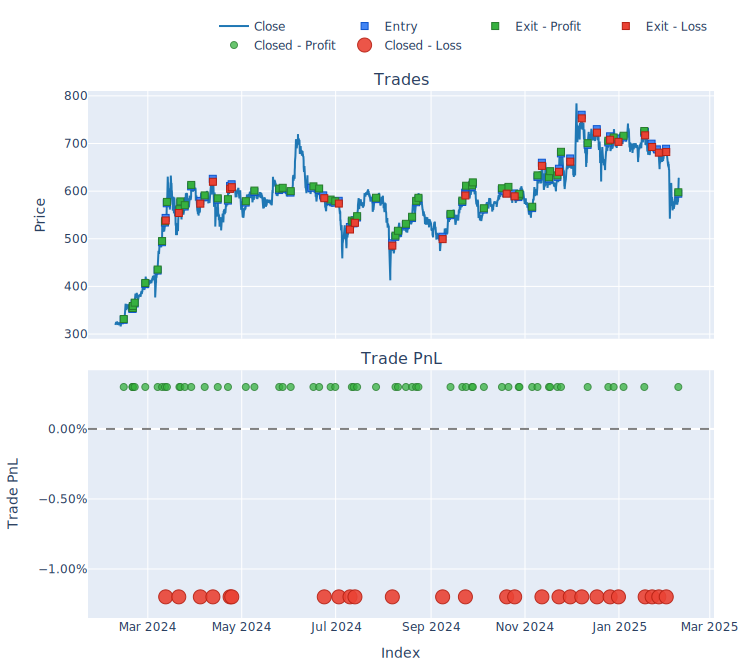

#########################


In [9]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      print(symbol)
      pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      print("#########################")